### Submission guidelines

1. Fill in your name in the notebook in the top cell.
2. Fill in the gaps in the code where indicated. <br> Make sure that you:<br> - fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE" <br> - **do not leave any `raise NotImplementedErrors`** in the code
3. Do **NOT change the variable names**, however, you can add comments in the code.
4. Do **NOT remove any of the cells** of the notebook!
5. Discussion is allowed, but every student needs to hand a personal version of the lab. Plagiarism will be sanctioned!   
6. Before submitting, restart your kernel & **make sure that every cell runs**.<br>Code that doesn't run will not be scored.<br>The notebooks with all source code, and optional extra files need to be handed in using Ufora.<br> Make sure all your notebooks are already executed when you upload them (i.e. there should be output after the cells). 
7. **Zip** your lab assignment folder and name the archive: `Surname_Name.zip` <br> Keep the same folder structure as the provided lab assignment!<br><span style='color: red'>Do not rename any of the notebooks or files</span>!<br>



In [1]:
NAME = "Cesar Zapata"

Final tip: make sure you have answered every question and filled in all the required code by running through the notebook and searching for YOUR ANSWER HERE and YOUR CODE HERE!
Good luck!

**You have to install for this lab some additional python packages. In the requirements.txt file, we provided all the necessary packages. If you use pip as package manager, you can install all the packages using the following command:
`pip install -r requirements.txt`. If you use conda as package manager, you can use the following command: `conda install -c conda-forge --file requirements.txt`**

In [1]:
# Import the primary data analysis libraries
import plotly.graph_objects as go; import numpy as np
from plotly_resampler import FigureResampler, FigureWidgetResampler
from tsfresh import extract_features
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import math

from plotly.offline import init_notebook_mode

c:\Users\cesar\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly_resampler\aggregation\aggregators.py:25: UserWarning: Could not import lttbc; will use a (slower) python alternative.
  warnings.warn("Could not import lttbc; will use a (slower) python alternative.")


---

# Lab: Mobile

This lab will focus on mobile or time series data.
You can use the experience of the previous pandas lab to manipulate, clean or vizualize parts of the available data. 

Note that all exercises in this lab are meant to be solved using the provided Python packages. Avoid coding functionality that is available in other packages beside the one mentioned above.

Modern mobile phones come equipped with a variety of sensors that can be used to capture and analyze various aspects of the phone's environment. These sensors include accelerometers, gyroscopes, magnetometers, GPS receivers, microphones, cameras, and proximity sensors. These sensors can be used to gather data over a period of time and analyze how the phone's behaviour changes over time. 

<img src="https://www.mdpi.com/sensors/sensors-19-02164/article_deploy/html/images/sensors-19-02164-g002.png"
     alt="Phone sensors"
     width="750" />

Mobile phone sensors can be incredibly useful in a healthcare context, as they allow for the collection of real-time, high-quality data that can be used to monitor patients and track their progress over time. For example, accelerometers and gyroscopes can be used to track a patient's movements and detect changes in their activity levels, which can be useful in managing chronic conditions like Parkinson's disease. GPS receivers can be used to track a patient's location, which can be useful in cases where patients have cognitive impairments or are prone to wandering. Additionally, microphones can be used to monitor a patient's breathing patterns and detect signs of respiratory distress, while cameras can be used to monitor a patient's skin for signs of pressure ulcers. Overall, the use of mobile phone sensors in healthcare can help to improve patient outcomes, reduce the cost of care, and enable more personalized and effective treatment plans.

These sensor data are inherently time series data because they capture information about changes in the phone's environment over time. In a time series context, these data points are arranged in chronological order, with each observation representing a snapshot of the phone's environment at a particular point in time. It is by analyzing these data points over time, researchers and developers can gain insights into how the phone's environment changes over time and how users interact with their devices. 

## Part 1: univariate time series

An univariate time series is a set of observations that measures changes in a single variable over time. In other words, it is a time series that tracks only one metric or data point over time. Univariate time series analysis involves analyzing the patterns and trends in this data over time, such as detecting seasonality, identifying trends, and forecasting future values. By focusing on a single variable, univariate time series analysis can provide valuable insights into the behavior of that variable over time, which can be useful for a wide range of applications.

The light sensor in a smartphone is such a univariate time series. It is a component that detects the ambient light levels surrounding the device. This sensor is typically located on the front of the phone near the earpiece, and it is used to automatically adjust the screen brightness based on the surrounding light conditions. 

<img src="https://i.ytimg.com/vi/2VirYjC48RA/maxresdefault.jpg"
     alt="Sound sensors"
     width="400" />

The light sensor works by measuring the intensity of light (measured in Lux) that falls on its surface and converting it into an electrical signal that can be processed by the phone's software. This signal is a univariate timeseries that represents the variation in light intensity over time. 

The data produced by the light sensor can be used for a variety of purposes, beyond determining when to turn on the phone's screen or adjusting the color temperature of the display to reduce eye strain. Overall, the light sensor is an important component of modern smartphones, and it plays a key role in improving the user experience by providing more accurate and responsive adjustments to the device's display settings.

**In this first part, you will analyse and investigate a light signal recorded from a smartphone's light sensor**

### Univariate Time series Data Exploration

within the assignment folder, you will find a file with *light.json* containing sound values captured from a mobile phone. Try to read this data in a Pandas dataframe. You can use the *pandas.read_json* functionality.

In [2]:
df = pd.read_json("data/light.json")
df

,time,elapsed_seconds,value
0,1672566284559000000,0.000,0
1,1672566286165000000,1.606,3
2,1672566287651000000,3.092,3
3,1672566289046000000,4.487,2
4,1672566290365000000,5.806,4
...,...,...,...
80,1672566497016000000,212.457,3
81,1672566498094000000,213.535,4
82,1672566499174000000,214.615,3
83,1672566500272000000,215.713,2


The dataframe generated from this json datafile contains three columns: 'time', 'elapsed_seconds' and 'value'.
Every row indicate a value in our time series signal. Combining all these signals together represents our time series data.

We will transform the 'time' column later in this lab. The 'elapsed_seconds' provides us already with some notion of time. It shows for every row the time relative in seconds, when it was generated given the start time at row index 0.

By looking at the last row in this dataframe, you can see the total duration of our time series signal.<br>
**What is the total duration in minutes? Try to give a programmatic answer by using the dataframe and e.g. the max() function** 

In [7]:
total_duration = df['elapsed_seconds'].max() / 60

print('The total duration in minutes is: {}'.format(round(total_duration,2)))

The total duration in minutes is: 3.61


The "value" column. As indicated in the text above these values are represented in Lux, a measure of the amount of light that falls on a surface. It is calculated by dividing the total light output of a source by the area over which it is distributed. In other words, Lux is a measure of the brightness of light that is perceived by the human eye.

Based on the different Lux ranges, one can try to understand where the person uses its smartphone. The table below provides you with a table defining the different Lux ranges in a diverse set of environments.

<img src="https://www.researchgate.net/publication/303294764/figure/tbl1/AS:614070734561285@1523417280413/Lux-level-estimates.png"
     alt="Sound sensors"
     width="400" />



**Use the max() function to get the largest Lux level in our time series data and intrepret this value based on the table above**

In [56]:
max_lux = df['value'].max()
lights = ["Twilight", "Minimal street lighting", "Sunset", "Family living room", "Hallway", "Very dark overcast day", "Office lighting", "Office lighting", "Overcast day", "Full daylight", "Full daylight", "Direct sunlight", "Direct sunlight"]
ranges = [1, 5, 10, 50, 80, 100, 320, 500, 1000, 10000, 25000, 32000, 130000]

# function that maps the ranges of Lux level and assigns the value to an interpretation comparison
def interpret(ranges, lights, value):

    if value == 400:
        return "Sunrise/sunset"
    
    for i in range(len(ranges)-1):
        if value >= ranges[i] and value < ranges[i+1]:
            return lights[i]
        
    print("value out of range, enter a valid one")
    return None


interpretation = interpret(ranges, lights, max_lux)

print(f'The max Lux level is: {max_lux} and this corresponds to a {interpretation} environment')

The max Lux level is: 69 and this corresponds to a Family living room environment


Of course, when working with time series data, it might be interesting to plot the obtained values in function of their timestamp.<br>

**Plot the Lux values in our dataframe in function of their 'elapsed_seconds'**

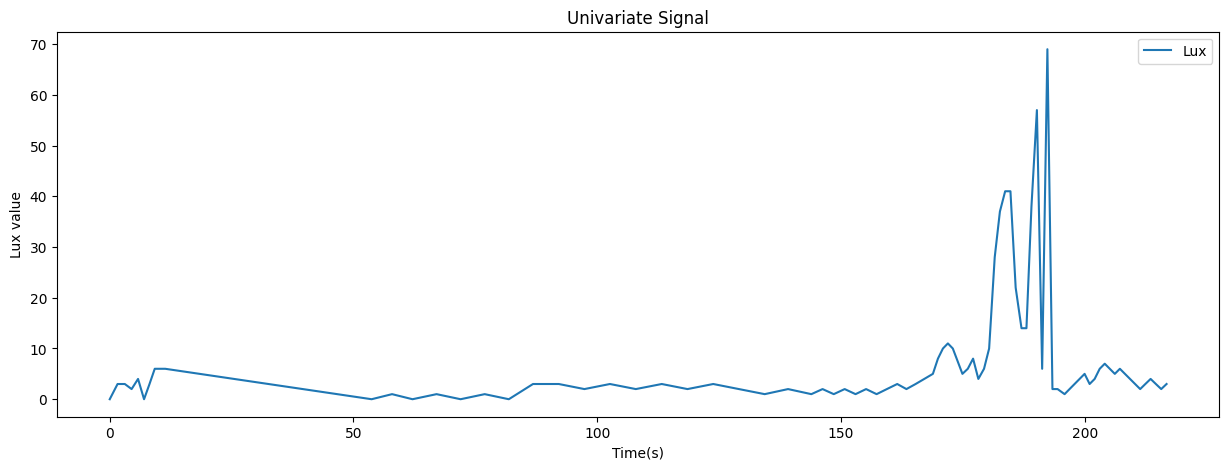

In [59]:
fig, axes = plt.subplots(1, figsize=(15, 5))

axes.plot(df['elapsed_seconds'], df['value'], label="Lux")

axes.set_title("Univariate Signal")
axes.set_xlabel("Time(s)")
axes.set_ylabel("Lux value")
axes.legend()

plt.show()

How would you interpret this signal? <br>
**Describe the signal and explain what happens with the smartphone in your own words**

In [ ]:
answer1 = """
What probably happened is that the person took the smartphone out of their pocket for a moment 
to look at something quickly (E.g. notification, hour, etc...) and then put it back in their pocket.
"""

print(answer1)

When recording this light signal from our smartphone, we hade to define a sampling rate. The sample rate (or sampling rate) is the number of samples taken per second. By explicitly stating this sampling rate in our smartphone application, we can calculate the number of expected samples over a larger period.

**We have set the sample rate for our light sensor to 0.5Hz (1 sample every 2 seconds). What is the total amount of samples that we expect in our dataset? You can use the math.ceil function to round the possible float value**

In [ ]:
expected_samples = # YOUR CODE HERE

print('The the total amount of expected samples is: {}'.format(expected_samples))

Compare this value with the provided amount of samples. **How many samples are missing?**

In [ ]:
amount_samples = # YOUR CODE HERE
missing = expected_samples-amount_samples

print("{} samples are missing from this dataset".format(missing))

**What could the possible cause of this mismatch?**

In [ ]:
answer2 = """
# YOUR ANSWER HERE
"""

print(answer2)

**Calculate the sample rate of the obtained signal**<br> 
You can use the inverse of the mean difference (diff) between the 'elapsed_seconds'.

In [ ]:
sample_rate = # YOUR CODE HERE

print('The sample rate of the obtained signal is: {}'.format(sample_rate))

We want our signal to be represented as an 0.5Hz time series as all logic built on top of this signal expects this sample rate. We therefore will upsample the amount of samples and try to deal with the missing data. Upsampling a dataframe in Pandas is an easy operation when the index column of the Pandas dataframe is represented as timestamp.

Currently, this is not the case, and all other columns are integer or floating point values. We will have to convert the time column first to a timestamp. The 'time' column provides the UNIX time, also known as POSIX time. It is a system for representing time as the number of seconds that have elapsed since January 1, 1970, at 00:00:00 UTC. It is a standardized way for computers to track and compare time and is commonly used in programming and operating systems.

What we want, is a UTC timestamp. UTC timestamp represents time in a standardized format that is based on the international time standard, Coordinated Universal Time (UTC). UTC timestamps are usually represented as a string of characters that includes the year, month, day, hour, minute, and second of a specific time, and optionally, the milliseconds, microseconds, or nanoseconds.

Online you can find converters between UNIX and UTC, such as https://www.unixtimestamp.com/ <br>

**Copy and paste the first UNIX timestamp of our dataset in this online converter. When (year, month, day, hour & minutes) was the start of this signal? Keep in mind that this signal was generated in Belgium**

In [ ]:
answer3="""
# YOUR ANSWER HERE
"""
print(answer3)

The online converter above (https://www.unixtimestamp.com/) also provides you with additional information, such as format of the UNIX time.

Python and Pandas provide you a way to transform these unix times to their human interpretable format. <br>
**Transform the 'time' column, representing the UNIX time, to UTC timestamp. Take a look at the pandas to_datetime function**

In [ ]:
df['time_utc'] = # YOUR CODE HERE

df['time_utc']

Keep in mind that this UTC timestamps will report the Greenwich time (UTC: 0). 

**Transform the timestamps within the time_utc to represent the time in Belgium. (you can use the tz_convert and tz_localize Pandas functions). To easily access datetimelike properties, take a look at pandas.Series.dt**

In [ ]:
# Try to localise first to Greenwich time and then convert to the local time in Belgium
df['time_belgium'] = # YOUR CODE HERE

df['time_belgium']

Now that we have human-readable timestamp within our dataframe, **we can set it as index in our dataframe and make a plot of the Lux values in function of the human readable time. Verify the difference in x-axis between this plot and the previous signal plot**

In [ ]:
# set the local time as index

df.index = # YOUR CODE HERE

In [ ]:
fig, axes = plt.subplots(1, figsize=(15, 5))
# Now, let's plot the lux values

# YOUR CODE HERE, REPLACE NONE
# NOTE: in the previous block, you've specified the index of the dataframe.
# Matplotlib will take by default the index column of a dataframe as x-axis
axes.plot(None,label='Lux')

# set the title and show the legend
axes.set_title("Univariate Signal")
axes.legend()
plt.show()

We still want our signal to be represented as an 0.5Hz time series. We have a valid time index column in our dataframe so we can now upsample the amount of samples and try to deal with the missing data. 

**Use the Pandas resample functionality and always keep the first value found. Warning: the resample function requires you to provide the sampling period instead of the sampling rate!**

In [ ]:
# YOUR CODE HERE, REPLACE NONE
resampled = df.resample(None).first()

resampled

**Recalculate the sample rate on this resampled dataframe, do you obtain a sample rate close to 0.5Hz?**
You will have to calculate the sampling rate based on index. The difference between two human readable timestamp will provide you with a pandas.Timedelta. Use the total_seconds function on each Timedelta to get the total amount of elapsed seconds.

In [ ]:
# put the index values of the resampled dataframe that contain the new time values in a new Series

index_values = resampled.index.to_series()

# now use these index_values to calculate the sample rate
sample_rate = # YOUR CODE HERE

print('The sample rate of the resampled signal is: {}'.format(sample_rate))

Plot the resampled dataframe in function of the elapsed_seconds before, what is the effect?

In [ ]:
fig, axes = plt.subplots(1, figsize=(15, 5))
# Now, let's plot the lux values

# YOUR CODE HERE, REPLACE NONE
axes.plot(None,label='Lux')

# set the title and show the legend
axes.set_title("Univariate Signal")
axes.legend()
plt.show()

We don't want these gaps in our data. To solve this, we can interpolate the timeseries and fill the missing values. In a strict sense, a linear interpolation was already performed in the plot of original data. With our expertise about light signals, we know that a linear interpolation is not the best fit to deal with these missing values.

**Use the Pandas interpolate function and try to fill in the gap as realistic as possible. Use an appropriate interpolation technique and explain why you would use this technique here. Make a plot to show that your interpolation function works** <br> https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html#pandas-dataframe-interpolate

In [ ]:
resampled['interpolatede_value'] = resampled['value']...# YOUR CODE HERE

In [ ]:
answer4="""
I've use the following interpolation function: [x] because ...
"""
print(answer4)

In [ ]:
fig, axes = plt.subplots(1, figsize=(15, 5))

# Now, let's plot the lux values

# YOUR CODE HERE, REPLACE NONE with correct interpolatede_value
axes.plot(None,label='Lux')

# set the title and show the legend
axes.set_title("Univariate Signal")
axes.legend()
plt.show()

### Univariate Time Series Feature Engeneering

Now that we have cleaned our dataframe and provided a solution for the available missing data, we can introduce some concepts of feature engeneering.

In [ ]:
cleaned_signal = resampled['value']

In many machine learning application, decisions are not made on individual sensor samples, but e.g. a classification task has to be performed in windows of X seconds or minutes. Within the context of time series data, this means that we buffer the data in such a window, calculate some interesting features based on this window and provide these features to a machine learning model per window. In a training phase, we have to create these windows by ourselves based on the provided larger signal.

Pandas provides functionalities to create these windows based on the GroupBy on timestamps function.
https://pandas.pydata.org/docs/reference/api/pandas.Grouper.html <br>

**Create windows with a frequency of 10s from the cleaned_signal dataframe. The groupby pandas function returns by default a SeriesGroupBy object of all groups. Show the table of the first 10s window from this object.**

In [ ]:
# make a group object using SeriesGroupBy that has windows with a frequency of 10s
groups = # YOUR CODE HERE

#show first 10s window
list(groups)[0][1]

**Is the amount of samples as expected in this first window?**

In [ ]:
answer5="""
# YOUR ANSWER HERE
"""
print(answer5)

**Calculate the mean and standard deviation for each 10s window of the above interpolated signal.** 

You can use the aggregator function to retrun one dataframe.
https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.aggregate.html

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

You can easily extract more features by extending the aggregator function (such as adding the min, max or custom functions). We will continue now with multivariate time series in the second part of this lab.

---
## Part 2: Multivariate time series


Multivariate time series data is a type of data that consists of multiple variables or features, each of which is measured over time. The smartphone accelerometer is such a multivariate sensor that measures the rate of change of the phone's velocity in three dimensions, providing information about the phone's movement.

<img src="https://www.mathworks.com/help/supportpkg/android/ref/simulinkandroidsupportpackage_galaxys4_accelerometer.png"  width="40%">

By collecting accelerometer data over time, we can generate a multivariate time series dataset that includes information about the acceleration in each of the X, Y, and Z directions at different points in time. This data can be used to analyze patterns in the movement of the smartphone, such as how often the user takes steps or changes direction or how fast they are moving. This type of data is useful in a variety of applications, such as activity recognition, gait analysis, and fall detection.

### Multivariate Time Series Data Exploration

We have provided a sensor measurement from the accelerometer in the assignment folder. **Load the 'accelerometer.json' file and verify that indeed three axis (x,y,z) are available in this dataset.**

In [ ]:
df = # YOUR CODE HERE
df

We don't have a 'elapsed_seconds' column in this dataframe. This can however be an interesting column to create by ourselves.

**Create the 'elapsed_seconds' column. You can do this either by:**
1) **Using the cummulative sum function from the differences between the UNIX times in the 'time' column. Take into account that these differences will be in nanoseconds and we want the elapsed_seconds**

2) **Using the cummulative sum function from the differences between the UTC timestamps, generated from the UNIX 'time' column. Going from UNIX to UTC can be done similar as in part 1.**


In [ ]:
df['elapsed_seconds'] = # YOUR CODE HERE

**What is the total duration in minutes? Try to give a programmatic answer by using the 'elapsed_seconds' column  and e.g. the max() function** 

In [ ]:
total_duration = # YOUR CODE HERE

print('The total duration in minutes is: {}'.format(round(total_duration,2)))

You can now plot the three axis of the accelerometer and investigate the signal based on the time series representation. We made all of our previous plots in matplotlib. In terms of possible interaction with the plot, matplotlib is somewhat limited..

We provided the full code to plot this accelerometer in plotly using our own plotly-resampler. Plotly is a very intuitive plotting framework and provides tools for pannin and zooming in plots. It was however very slow when large amounts of data (read: time series data) had to be provided within these plots. Plotly-resampler resolve this issue by downsampling (aggregating) the data respective to the view and then plotting the aggregated points. When you interact with the plot (panning, zooming, ...), callbacks are used to aggregate data and update the figure.

**Run the cell below and pan or zoom in the data to see the advantage of Ploty and Plotly-resampler. When you hover with you mouse on the plot, you will see an option panel on the top right that you can use. You can also select certain regions in the plot itself to change the view. The reset axes option can always be used to go back to the original full signal view.***

In [ ]:
fig = FigureWidgetResampler(go.Figure())
fig.add_trace(go.Scattergl(name='x', showlegend=True), hf_x=df['elapsed_seconds'], hf_y=df['x'])
fig.add_trace(go.Scattergl(name='y', showlegend=True), hf_x=df['elapsed_seconds'], hf_y=df['y'])
fig.add_trace(go.Scattergl(name='z', showlegend=True), hf_x=df['elapsed_seconds'], hf_y=df['z'])

fig

**The accelermeter window is a representation of multiple human activities (standing, sitting, lying down, walking, jumping etc). Can you give a brief overview of the activities performed in this dataset? List them in your answer below and provide the start and end time for each activity (you can use the elapsed_time column). Use a combination of the interactive Plotly plot and e.g. the smartphone figure in the beginning of part 2 to make the correct conclusions**

In [ ]:
Answer6 = """
From second X till second Y someone performed Activity Z
...
"""
print(Answer6)

### Multivariate Time Series Feature Engeneering

Similar as within the univariate case, we can calculate features from this univarate timeseries. We can calculate featuers for each variable individually (e.g. mean values for x, y & z) but more interesting are features which combine information form multiple variables together. 

One such feature is the activity index: 
Given a dataframe with x,y,z accelerometer values, the activity index is the square root of the mean variance over the 3 axis.

$$ activity\_index = \sqrt{{\frac {1}{3}}\sum_{i}^3 Var(channel[i])} $$
with channel[i] either x,y or z.

**Implement the activity index in the function below. You can use the var function of the numpy package to calculate the variance.**

In [ ]:
def calc_activity_index(dataframe, channels=['x','y','z']):
    """
    Compute activity index of sensor signals.
    :param signal_df: dataframe housing desired sensor signals
    :param channels: channels of signal to compute activity index
    """
    
    activity_index =  # YOUR CODE HERE
    
    return activity_index

**Next, verify that your function works by calculating the activity index for three selected regions in the dataframe above. Use e.g. `df[(df['elapsed_seconds']>30) & (df['elapsed_seconds']<50)]` to select a region with high, medium and a low activity index respectively.**

In [ ]:
# make a dataframe with only the high activity region
high_activity_region = # YOUR CODE HERE
high_activity_index = calc_activity_index(high_activity_region)
print('The activity index for the selected high activity region is: {}'.format(high_activity_index))



# make a dataframe with only the medium activity region
medium_activity_region = # YOUR CODE HERE
medium_activity_index = calc_activity_index(medium_activity_region)
print('The activity index for the selected medium activity region is: {}'.format(medium_activity_index))



# make a dataframe with only the low activity region
low_activity_region = # YOUR CODE HERE
low_activity_index = calc_activity_index(low_activity_region)
print('The activity index for the selected low activity region is: {}'.format(low_activity_index))


**Is this behaviour as expected?**

In [ ]:
Answer7 = """
This behaviour is ...
"""
print(Answer7)

Of course, the activity index could vary over time within our dataframes and it is probably a better idea to calculate the activity index in windows of X seconds.

**Calculate the activity index on windows with a frequency of 10 seconds. You will need a UTC timestamp index to select these windows. If you didn't create this timestamp in the past, you can do it here.**

In [ ]:
# make a utc time index (optional)
df['utc_time'] = # YOUR CODE HERE
df.index = df['utc_time']

In [ ]:
# make groups with frequency 10s
ten_seconds_groups = # YOUR CODE HERE

# apply the activity index calculation to the windows
activity_index_every_ten_seconds = ten_seconds_groups.apply(calc_activity_index)
activity_index_every_ten_seconds

The activity_index_every_ten_seconds returned every 10 seconds a value. This is actually an univariate time series, created from a multivariate one. We can visualize visualize this univaraite time series. <br>
**Make a plot from the activity_index_every_ten_seconds dataframe. You can either use matplotlib code from part 1 or use pltoly code from above.**

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Of course, python packages exists which can generate a large amount of features based on timeseries data.
One such common used python package is tsfresh: https://tsfresh.readthedocs.io/en/latest/

Take your time to read the quick example of this python package and try to understand the required dataframe representation.

Similar to provided example in the documentation, we have a multivariate time series dataframe (X,Y,Z values). 
We also have a time column to sort our dataframe.
What is currently missing, is an id column. 

We only have only one file, so we could try to create an id column with a constant value here.

In [ ]:
df['id'] = 1

Next, we can apply the tsfresh feature extraction tool to create a large amount of features.<br>
*note: to speed up this process, we will only extract features on the first 1000 rows of our dataframe.*

In [ ]:
df = df.iloc[0:1000,:]

#note: extract_features is a tsfresh function
extracted_features = extract_features(df[['x','y','z','id','time']], column_id="id", column_sort="time")

extracted_features

**How many features are generated?**

In [ ]:
nr_of_features = # YOUR CODE HERE

print("tsfresh extracted {} features".format(nr_of_features))

You should be aware that we only have one row with a large amount of features. This means that we generated features for the whole timespan (1000 rows) of the dataframes. This is might not be very interesting. As illustrated before, generating features over a predifned window would be more interesting. **Therefore, one can manipulate the id column to represent the windows. Values belonging to the same window should have the same id.**

**Calculate tsfresh features for each 10s window. Take a look at the ngroup() groupby function as this will help you to identify the 'id' column.**

In [ ]:
# Create a new ID for each window of 10s, take a look at the ngroup function
df['id'] = df.groupby(pd.Grouper(freq='10s')).ngroup()

extracted_features = # YOUR CODE HERE

extracted_features

**For how many windows did we generate features? (keep in mind that we only generated features for the first 1000 rows of the original signal)**

In [ ]:
nr_of_windows = # YOUR CODE HERE

print("tsfresh extracted features for {} windows.".format(nr_of_windows))

Not all features discriminate the different windows. Especially the features which share similar values in each windows are less of interest. **Remove the columns from the extracted_features dataframe where all the values in these columns are the same. How many interesting features to we keep?**

In [ ]:
#count number of unique values in each column (you can use the nunique pandas function)
nunique = # YOUR CODE HERE

#select the columns for which the nunique values are equal to the amount of rows (all have the same value)
# YOUR CODE HERE, CHANGE NONE
cols_to_drop = nunique[nunique==None].index


#drop these columns from our dataframe.
extracted_features = # YOUR CODE HERE

In [ ]:
nr_of_unique_values = # YOUR CODE HERE

print("After removing the columns which have unique values in all the rows, we keep {} features".format(nr_of_unique_values))

# End of lab
---

In this lab, you had in introduction about time series analysis.<br>
you analysed both univariate and multivariate signals, created features both manually and by using python packages and used plots to understand and visualize the obtained signals.

Make sure you provided your name in the first cell of this practicum and **Zip** your lab assignment folder and name the archive: `Surname_Name.zip` <br> Keep the same folder structure as the provided lab assignment.